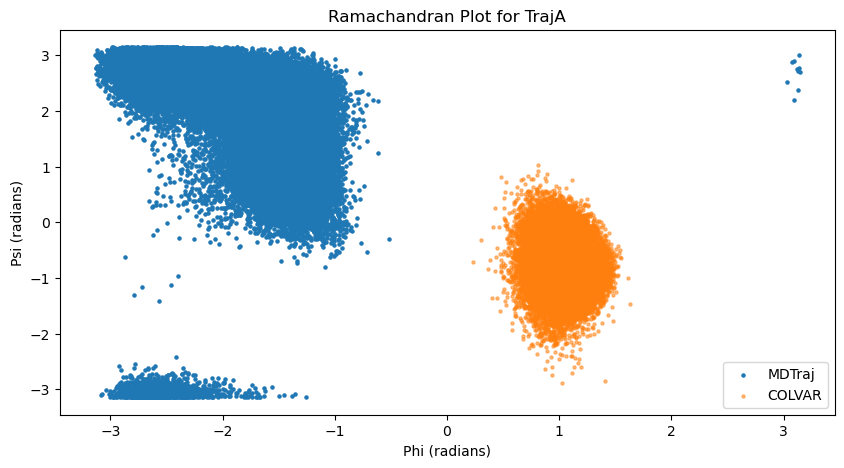

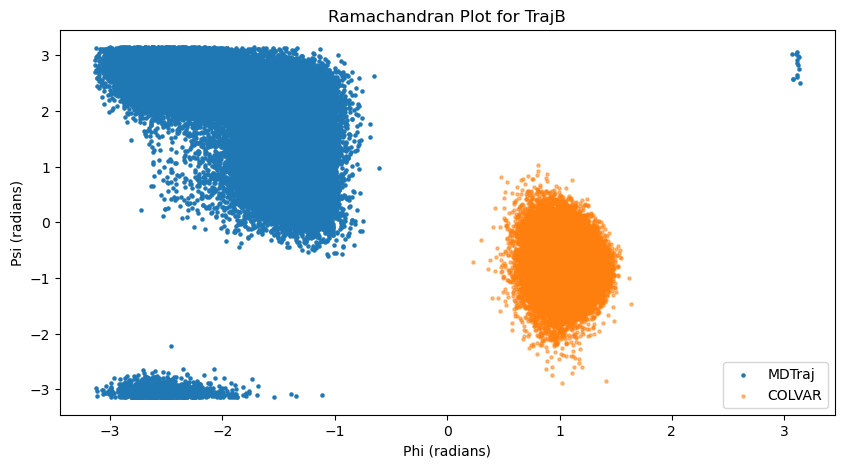

Standard Deviation of Phi for TrajA: 0.1323817662350665
Standard Deviation of Psi for TrajA: 0.34453442436874376
Standard Deviation of Phi for TrajB: 0.1323817662350665
Standard Deviation of Psi for TrajB: 0.34453442436874376


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Load COLVAR data
data_A = np.loadtxt('../Inputs/COLVAR_A')
data_B = np.loadtxt('../Inputs/COLVAR_B')

# Extract phi and psi values
phi_A, psi_A = data_A[:,1], data_A[:,2]
phi_B, psi_B = data_B[:,1], data_B[:,2]

# Load the trajectory
traj_A = md.load('../Inputs/traj_comp_A.xtc', top='../Inputs/dialaA.pdb')
traj_B = md.load('../Inputs/traj_comp_B.xtc', top='../Inputs/dialaB.pdb')

# Compute phi and psi dihedrals
phi_indices, phi_values = md.compute_phi(traj_A)
psi_indices, psi_values = md.compute_psi(traj_A)

phi_indices_B, phi_values_B = md.compute_phi(traj_B)
psi_indices_B, psi_values_B = md.compute_psi(traj_B)

# Plot for trajA
plt.figure(figsize=(10, 5))
plt.scatter(phi_values, psi_values, s=5, label='MDTraj')
plt.scatter(phi_A, psi_A, s=5, label='COLVAR', alpha=0.5)
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Ramachandran Plot for TrajA')
plt.legend()
plt.show()

# Plot for trajB
plt.figure(figsize=(10, 5))
plt.scatter(phi_values_B, psi_values_B, s=5, label='MDTraj')
plt.scatter(phi_B, psi_B, s=5, label='COLVAR', alpha=0.5)
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Ramachandran Plot for TrajB')
plt.legend()
plt.show()

std_phi_A = np.std(phi_A)
std_psi_A = np.std(psi_A)

std_phi_B = np.std(phi_B)
std_psi_B = np.std(psi_B)

print(f"Standard Deviation of Phi for TrajA: {std_phi_A}")
print(f"Standard Deviation of Psi for TrajA: {std_psi_A}")
print(f"Standard Deviation of Phi for TrajB: {std_phi_B}")
print(f"Standard Deviation of Psi for TrajB: {std_psi_B}")


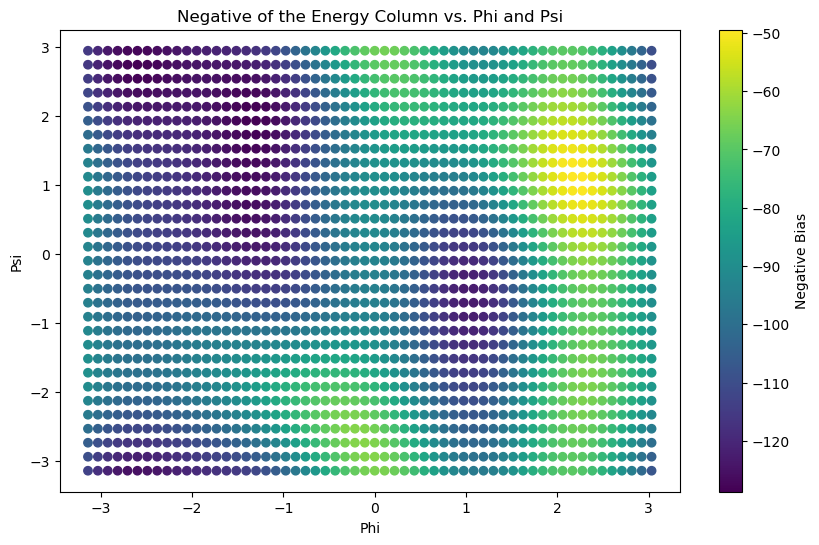

In [7]:

# Load the data
data = np.loadtxt('../Inputs/Structure_A/metad_2D_A.grid.dat', comments=['!', '#'])

# Extract the phi, psi, and metad.bias columns
phi = data[:, 0]
psi = data[:, 1]
bias = data[:, 2]

# Plot the negative of the metad.bias
plt.figure(figsize=(10, 6))
plt.scatter(phi, psi, c=-bias, cmap='viridis')
plt.colorbar(label='Negative Bias')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('Negative of the Energy Column vs. Phi and Psi')
plt.show()


Text(0.5, 0, 'Time (ps)')

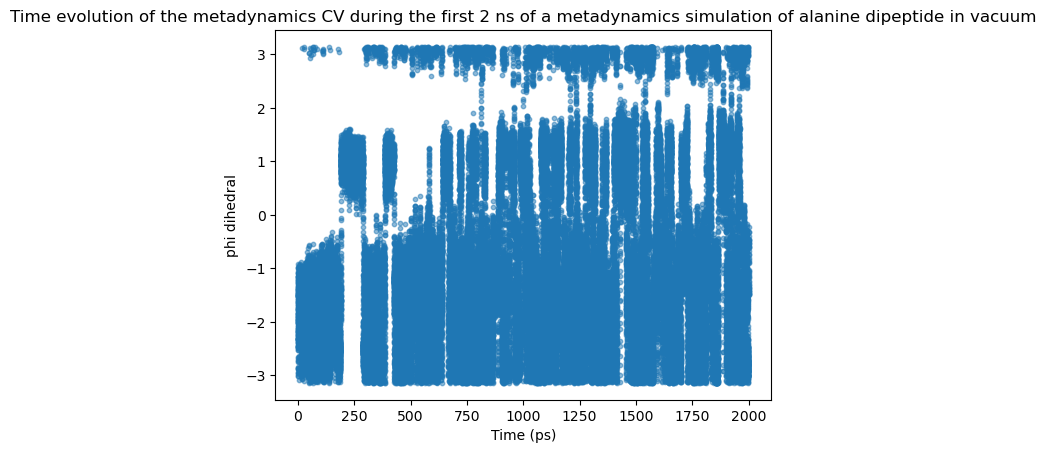

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

meta_grid = np.loadtxt('../Inputs/Structure_A/COLVAR',
                       comments='#')
time = meta_grid[:, 0]
time = time[time < 2000]
phi = meta_grid[:, 1]
phi = phi[:len(time)]
# plot time < 2ns the change of phi
plt.figure()
plt.scatter(time, phi, alpha=0.5, s=10)
plt.title('Time evolution of the metadynamics CV during the first 2 ns of a metadynamics simulation of alanine dipeptide in vacuum')
plt.ylabel('phi dihedral')
plt.xlabel('Time (ps)')

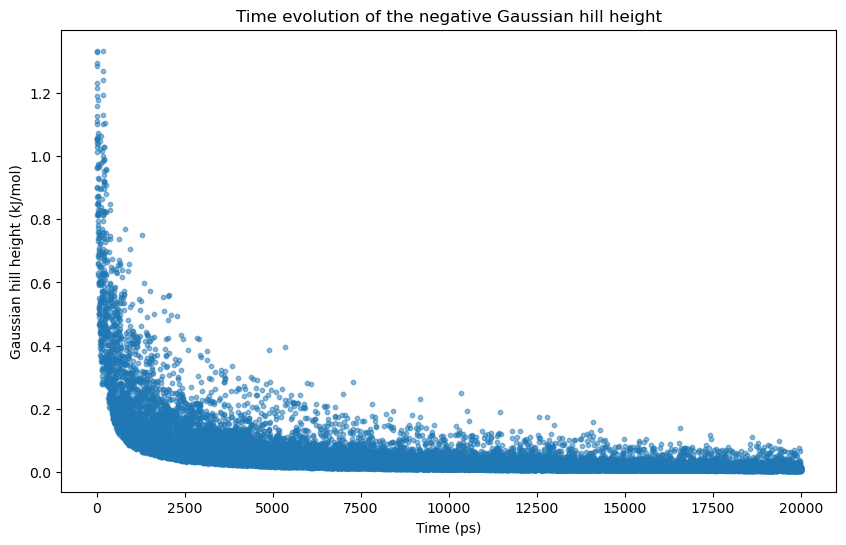

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the HILLS data
meta_grid = np.loadtxt('../Inputs/Structure_A/HILLS', comments='#')

# Extract the time and negative of the energy (height) columns
time = meta_grid[:, 0]
negative_energy = meta_grid[:, 5]

# Plot the negative of the Gaussian hill height as a function of time
plt.figure(figsize=(10, 6))
plt.scatter(time, negative_energy, alpha=0.5, s=10)
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian hill height (kJ/mol)')
plt.title('Time evolution of the negative Gaussian hill height')
plt.show()


Text(0.5, 1.0, 'Estimate of the free energy as a function of the dihedral \nphi from a 10ns-long well-tempered metadynamics simulation.')

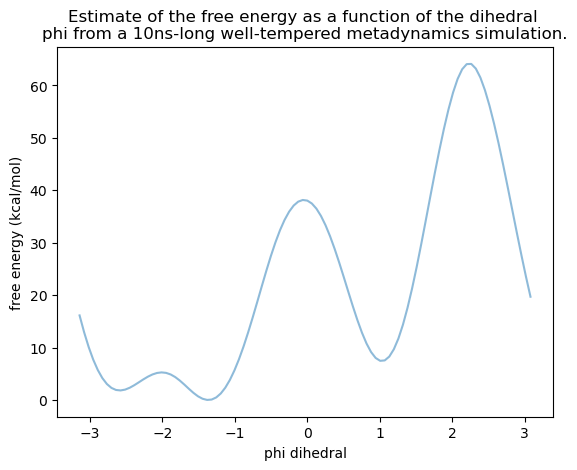

In [1]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

meta_hill = np.loadtxt('../Inputs/Structure_A/Hills_summed.dat', comments='#')
plt.plot(meta_hill[:,0], meta_hill[:,1], alpha=0.5)
plt.xlabel('phi dihedral')
plt.ylabel('free energy (kcal/mol)')
plt.title('Estimate of the free energy as a function of the dihedral \n'
          'phi from a 10ns-long well-tempered metadynamics simulation.')

Text(0.5, 1.0, 'Estimate of the free energy as a function of the dihedral \nphi from a 10ns-long well-tempered metadynamics simulation.')

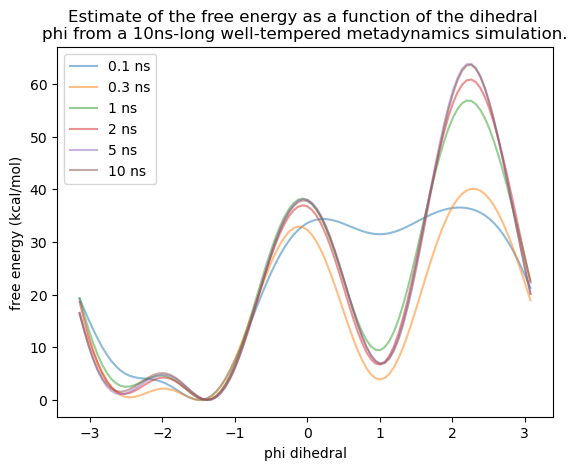

In [3]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

dat1=np.loadtxt('../Inputs/Structure_A//stride/fes_1.dat', comments='#')
dat2=np.loadtxt('../Inputs/Structure_A/stride/fes_3.dat', comments='#')
dat3=np.loadtxt('../Inputs/Structure_A/stride/fes_10.dat', comments='#')
dat4=np.loadtxt('../Inputs/Structure_A/stride/fes_20.dat', comments='#')
dat5=np.loadtxt('../Inputs/Structure_A/stride/fes_50.dat', comments='#')
dat6=np.loadtxt('../Inputs/Structure_A/stride/fes_100.dat', comments='#')

plt.plot(dat1[:,0], dat1[:,1], alpha=0.5, label='0.1 ns')
plt.plot(dat2[:,0], dat2[:,1], alpha=0.5, label='0.3 ns')
plt.plot(dat3[:,0], dat3[:,1], alpha=0.5, label='1 ns')
plt.plot(dat4[:,0], dat4[:,1], alpha=0.5, label='2 ns')
plt.plot(dat5[:,0], dat5[:,1], alpha=0.5, label='5 ns')
plt.plot(dat6[:,0], dat6[:,1], alpha=0.5, label='10 ns')

plt.xlabel('phi dihedral')
plt.ylabel('free energy (kcal/mol)')
plt.legend()
plt.title('Estimate of the free energy as a function of the dihedral \n'
            'phi from a 10ns-long well-tempered metadynamics simulation.')


Text(0.5, 1.0, 'Estimate of the 2D free energy as a function of the dihedral \nphi from a 10ns-long well-tempered metadynamics simulation.')

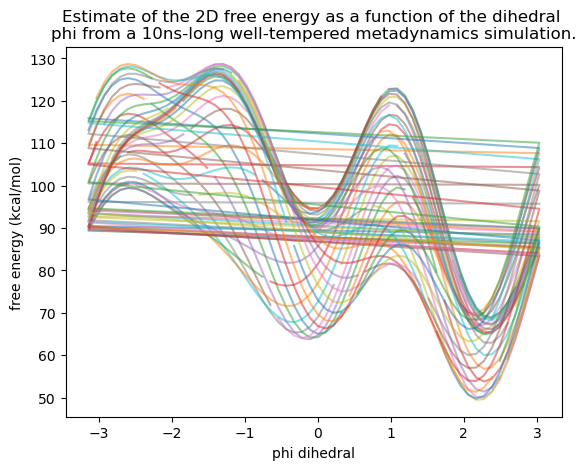

In [3]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

meta_hill = np.loadtxt('../Inputs/Structure_A/metad_2D_phi_psi.dat', comments='#')

for i in range(int(meta_hill.shape[0] / 33)):
    plt.plot(meta_hill[i*33:(i+1)*33,0], meta_hill[i*33:(i+1)*33,2], alpha=0.5, label='bias factor=1')
plt.xlabel('phi dihedral')
plt.ylabel('free energy (kcal/mol)')
plt.title('Estimate of the 2D free energy as a function of the dihedral \n'
            'phi from a 10ns-long well-tempered metadynamics simulation.')

Text(0.5, 1.0, '2D Time evolution of the negative Gaussian hill height')

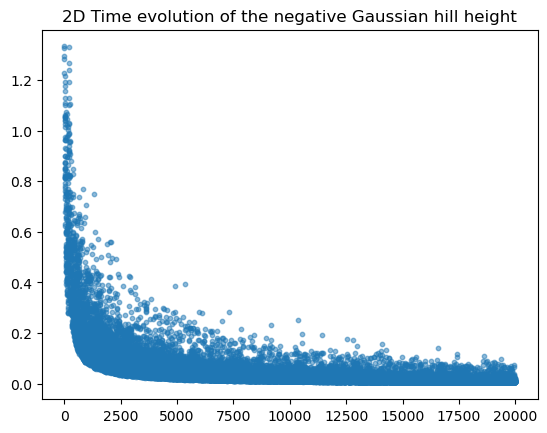

In [15]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt


meta_grid = np.loadtxt('../Inputs/Structure_A/HILLS', comments='#')
plt.scatter(meta_grid[:, 0], meta_grid[:, 5], alpha=0.5, s=10)
plt.title('2D Time evolution of the negative Gaussian hill height')

Text(0.5, 0, 'Time (ps)')

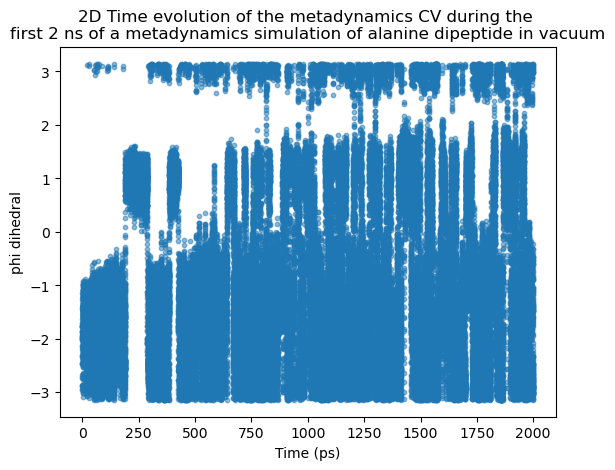

In [17]:
meta_grid = np.loadtxt('../Inputs/Structure_A/COLVAR_2D',
                       comments='#')
time = meta_grid[:, 0]
time = time[time < 2000]
phi = meta_grid[:, 1]
phi = phi[:len(time)]
# plot time < 2ns the change of phi
plt.figure()
plt.scatter(time, phi, alpha=0.5, s=10)
plt.title('2D Time evolution of the metadynamics CV during the \n'
          'first 2 ns of a metadynamics simulation of alanine dipeptide in vacuum')
plt.ylabel('phi dihedral')
plt.xlabel('Time (ps)')

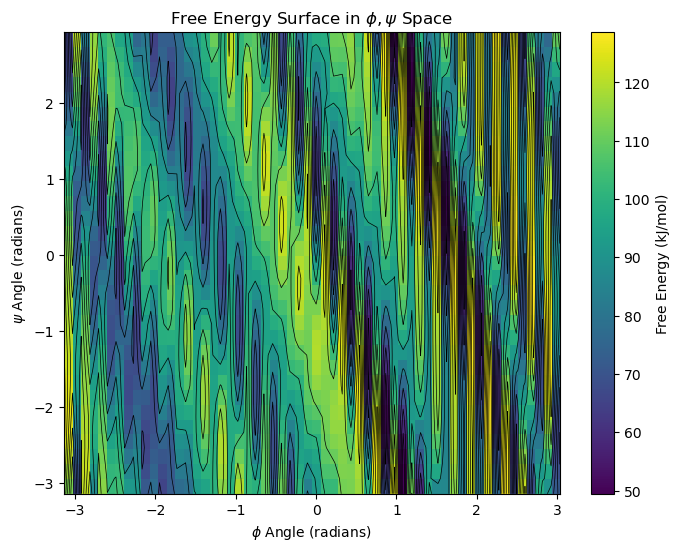

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
data = np.loadtxt('../Inputs/Structure_A/metad_2D_phi_psi.dat')

# Assuming the file has columns for phi, psi, and free energy.
# Adjust indices if different.
phi = data[:, 0]
psi = data[:, 1]
fes = data[:, 2]

# 2. Reshape the data into a 2D grid
phi_values = np.unique(phi)
psi_values = np.unique(psi)
fes_grid = fes.reshape(len(phi_values), len(psi_values))

# 3. Plot the FES using imshow
plt.figure(figsize=(8, 6))
img = plt.imshow(fes_grid.T, origin='lower', aspect='auto', cmap='viridis', 
                 extent=[phi.min(), phi.max(), psi.min(), psi.max()])

# 4. Add contours
contour_levels = np.linspace(fes.min(), fes.max(), num=10)
plt.contour(phi_values, psi_values, fes_grid.T, levels=contour_levels, colors='black', linewidths=0.5)

# 5. Add labels, title, and colorbar
plt.colorbar(img, label='Free Energy (kJ/mol)')
plt.xlabel(r'$\phi$ Angle (radians)')
plt.ylabel(r'$\psi$ Angle (radians)')
plt.title(r'Free Energy Surface in $\phi, \psi$ Space')
plt.show()
